In [2]:
import numpy as np
import astropy.io.fits as fits
from astropy.table import Table
import ligo.skymap.plot
from matplotlib import pyplot as plt

import healpy as hp
from matplotlib.colors import TwoSlopeNorm
from astropy.coordinates import SkyCoord
import pickle

In [3]:
# change the cat file
with fits.open("/home/tguethle/cookbook/SPI_cookbook/cats/cat_crab.fits.gz") as hdul:
    cat = hdul[1].data
    
    cat[0]["Name"] = "sim_source"
    cat[0]["RA_OBJ"] = 10
    cat[0]["DEC_OBJ"] = -40
    cat[0]["SPI_FLUX_1"] = 0
    cat[0]["SPI_FLUX_2"] = 0
    h = hdul[1].header

    hdul[1].data = cat

    print(hdul[1].data)
    hdul.info()
    t = Table(hdul[1].data)
    #hdul.writeto("/home/tguethle/cookbook/SPI_cookbook/cats/cat_sim_source.fits.gz", overwrite=True)
t

[('J053432.0+220052', 0., 'sim_sourc', 3101, 10., -40., 0.00028, 2, 1, 1, 1, '', 0, [0., 0., 0., 0., 0., 0., 0., 0.], 'wabs*powerlaw', 3, [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], '', 0, [0., 0., 0., 0., 0., 0., 0., 0.], 'V* CM Tau, SNR 184.6-05.8, PSR B0531+21, 1H 0531+219, 2EG J0534+2158, 3A 0531+219, 3EG J0534+2200, 4U 0531+21, Crab Nebula, Tau', 0., 0., 230.9226, 59.45829, 16.52609, 1.045729, 0.5005482, 0.1424853, [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

BIRD_SOURCE_ID,DAY_ID,NAME,CLASS,RA_OBJ,DEC_OBJ,ERR_RAD,ISGRI_FLAG,JEMX_FLAG,SPI_FLAG,PICSIT_FLAG,SPA_MODL,SPA_NPAR,SPA_PARS,SPE_MODL,SPE_NPAR,SPE_PARS,VAR_MODL,VAR_NPAR,VAR_PARS,COMMENTS,SPI_FLUX_1,SPI_FLUX_2,ISGR_FLUX_1,ISGR_FLUX_2,PICS_FLUX_1,PICS_FLUX_2,JEMX_FLUX_1,JEMX_FLUX_2,E_MIN,E_MAX,FLUX,FLUX_ERR,SEL_FLAG,FLAG,SOURCE_ID
str16,float64,str9,int16,float32,float32,float32,uint8,uint8,uint8,uint8,str32,int16,float32[8],str128,int16,float32[32],str128,int16,float32[8],str128,float32,float32,float32,float32,float32,float32,float32,float32,float32[256],float32[256],float32[256],float32[256],int16,int16,str9
J053432.0+220052,0.0,sim_sourc,3101,10.0,-40.0,0.00028,2,1,1,1,,0,0.0 .. 0.0,wabs*powerlaw,3,0.0 .. 0.0,,0,0.0 .. 0.0,"V* CM Tau, SNR 184.6-05.8, PSR B0531+21, 1H 0531+219, 2EG J0534+2158, 3A 0531+219, 3EG J0534+2200, 4U 0531+21, Crab Nebula, Tau",0.0,0.0,230.9226,59.45829,16.52609,1.045729,0.5005482,0.1424853,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,1,0,Crab


In [4]:
# take a look at the response of spimodfit
spimodfit_path = "/home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/fit_Crab_bright_100_new/"
response_name = "convolved_sky_images.fits"

with fits.open(spimodfit_path + response_name) as hdul:
    hdul.info()
    t = Table(hdul[2].data)

t

counts = t["COUNTS"]
counts.shape

Filename: /home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/fit_Crab_bright_100_new/convolved_sky_images.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   ()      
  1  GROUPING      1 BinTableHDU     29   1R x 6C   [8A, 32A, 1J, 1J, 256A, 3A]   
  2  SPI.-BMOD-DSP    1 BinTableHDU     82   779R x 2C   [41E, 41E]   


(779, 41)

In [5]:
41*19

779

In [6]:
with open('/home/tguethle/Documents/spi/Master_Thesis/main_files/spimodfit_comparison_sim_source/pyspi_real_bkg_control/0374/pre_ppc/source_parameters.pickle', 'rb') as f:
    data = pickle.load(f)
    print(data)

(array([ 0.00566636, -1.91462842]), array([[ 4.08042926e-10, -5.65719162e-08],
       [-5.65719162e-08,  4.53306226e-05]]))


## Spectrum Simulated source

Filename: /home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/fit_Crab_374_real_bkg_para2/spectra_sim_sourc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   ()      
  1  GROUPING      1 BinTableHDU     34   1R x 6C   [8A, 32A, 1J, 1J, 256A, 3A]   
  2  SPECTRUM      1 BinTableHDU    117   41R x 8C   [1I, 1E, 1E, 1E, 1I, 1I, 1E, 1E]   


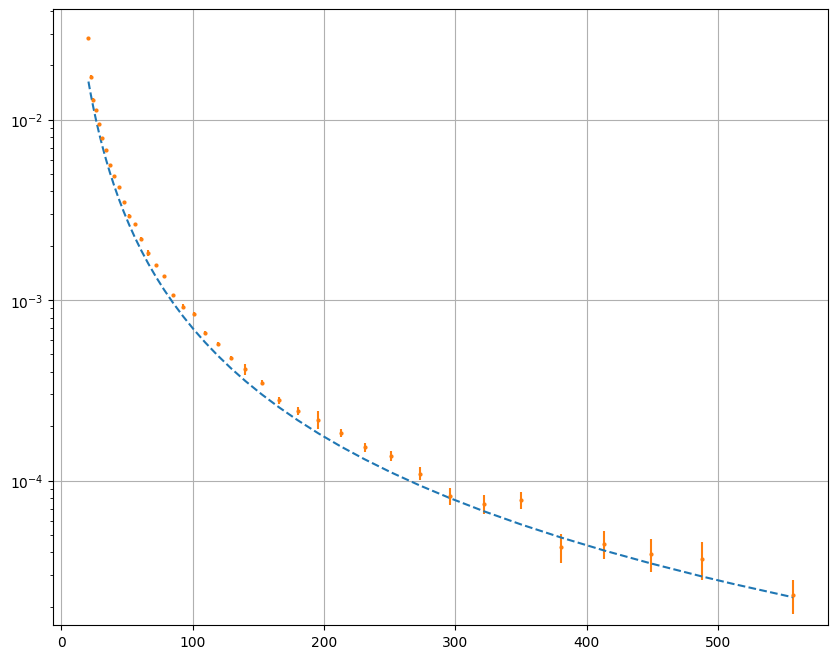

In [7]:
spectrum = '/home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/fit_Crab_374_real_bkg_para2/spectra_sim_sourc.fits'
normal_E_Bins = [20.0, 21.5, 23.5, 25.5, 27.5, 30.0, 32.5, 35.5, 38.5, 42.0, 45.5, 49.5, 54.0, 58.5, 63.5, 69.0, 75.0, 81.5, 89.0, 96.5, 105.0, 114.0, 124.0, 134.5, 146.0, 159.0, 172.5, 187.5, 204.0, 221.5, 240.5, 261.5, 284.0, 308.5, 335.5, 364.5, 396.0, 430.0, 467.5, 508.0, 514, 600]
energies = np.array([(i+j)/2 for i, j in zip(normal_E_Bins[:-1], normal_E_Bins[1:])])
bin_widths = np.array([j-i for i, j in zip(normal_E_Bins[:-1], normal_E_Bins[1:])])


with fits.open(spectrum) as hdul:
    hdul.info()
    data = hdul[2].data
data

def powerlaw(x, K, index, piv):
    return K * (x/piv)**index

flux = data['DFLUX'] * bin_widths

fig, ax = plt.subplots(figsize=(10, 8))
ax.grid()

#plt.scatter(energies, data['RATE'])
ax.errorbar(energies, data['DFLUX'], yerr=data['DFLUX_ERR'], c='tab:orange', linestyle='None', marker='o', markersize=2, zorder=2)
ax.plot(energies, powerlaw(energies, 7e-4, -2.0, 100.0), linestyle='dashed')
#plt.plot(energies, powerlaw(energies, 7e-2, -2.0, 100.0))
#plt.scatter(energies, flux, c='tab:green')
#plt.xscale('log')
plt.yscale('log')


In [8]:
data['DFLUX_ERR']

array([3.53361975e-04, 2.73957179e-04, 2.37374115e-04, 1.27942956e-04,
       7.79419133e-05, 6.54816104e-05, 5.21202419e-05, 4.63289216e-05,
       3.93262344e-05, 3.65304841e-05, 3.33840617e-05, 5.71283090e-05,
       6.24641543e-05, 5.49075667e-05, 6.74370094e-05, 2.21009286e-05,
       1.89564689e-05, 1.65963247e-05, 2.93796656e-05, 1.94995264e-05,
       1.31698071e-05, 1.34787942e-05, 1.32275263e-05, 2.73204041e-05,
       1.09117182e-05, 1.14179320e-05, 1.30839635e-05, 2.56421717e-05,
       9.33878346e-06, 9.05400248e-06, 8.47423144e-06, 8.89288185e-06,
       9.03742512e-06, 8.72259534e-06, 8.18240824e-06, 7.95878532e-06,
       7.91673028e-06, 8.12796770e-06, 8.57855048e-06, 2.94473248e-05,
       5.04386162e-06], dtype=float32)

In [9]:
expo_map_path = '/home/tguethle/cookbook/SPI_cookbook/examples/Crab/dataset_skymap44/expo.fits'

pointings = '/home/tguethle/Documents/spi/Master_Thesis/spiselect_SPI_Data/0374_center/pointing.fits'

dead_time = '/home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/dataset_374_all_data/spi/evts_det_spec.fits.gz'

dead_time_2 = '/home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/dataset_374_all_data/spi2/evts_det_spec.fits'
pointings_2 = '/home/tguethle/Documents/spi/Master_Thesis/afs_SPI_Data/0422/pointing.fits'

with fits.open(dead_time) as hdul:
    hdul.info()
    data_dead_time = hdul[1].data
    expo_map_header = hdul[1].header

with fits.open(pointings) as hdul:
    hdul.info()
    data_pointings = hdul[1].data
    expo_map_header = hdul[1].header

with fits.open(dead_time_2) as hdul:
    hdul.info()
    data_dead_time_2 = hdul[1].data
    expo_map_header = hdul[1].header

with fits.open(pointings_2) as hdul:
    hdul.info()
    data_pointings_2 = hdul[1].data
    expo_map_header = hdul[1].header

data_pointings

Filename: /home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/dataset_374_all_data/spi/evts_det_spec.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  SPI.-OBS.-DSP    1 BinTableHDU     80   1292R x 2C   [9J, 9E]   
Filename: /home/tguethle/Documents/spi/Master_Thesis/spiselect_SPI_Data/0374_center/pointing.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  SPI.-OBS.-PNT    1 BinTableHDU     99   41R x 11C   [8A, 15A, 4I, 4I, 1D, 1D, 1D, 1E, 1E, 1E, 1E]   
Filename: /home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/dataset_374_all_data/spi2/evts_det_spec.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  SPI.-OBS.-DSP    1 BinTableHDU     81   5780R x 2C   [9J, 9E]   
Filename: /home/tguethle/Documents/spi/Master_Thesis/afs_SPI_Data/0422/pointing.fit

FITS_rec([('03740001', '03740001.000000', [     0,  23523,  23392,  63737], [     0,  23523,  32836,  43300], 2135.25203917, 2135.25887054,  590.23083747, 14.359367 , -46.588104, 229.94302, -37.57425 ),
          ('03740002', '03740002.000000', [     0,  23523,  35168,  63308], [     0,  23524,  12715,  46651], 2135.26055769, 2135.29172288, 2692.6731186 , 13.767507 , -46.369335, 230.1961 , -37.48927 ),
          ('03740003', '03740003.000000', [     0,  23524,  14688,  61659], [     0,  23524,  57391,  57115], 2135.29315028, 2135.32404073, 2668.93465422, 11.059443 , -45.68437 , 230.99942, -36.81915 ),
          ('03740004', '03740004.000000', [     0,  23524,  59360,  60025], [     0,  23525,  36473,  15008], 2135.32546509, 2135.35631603, 2665.52106031,  8.418544 , -44.942196, 231.72835, -36.096745),
          ('03740005', '03740005.000000', [     0,  23525,  38880,  58374], [     0,  23526,  15469,  31713], 2135.35805769, 2135.38852977, 2632.78855823,  5.848483 , -44.144936, 232.3689 

In [12]:
len(list(np.arange(20, 600.5, 0.5)))


1161

In [ ]:
with fits.open('/home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/dataset_374_100_bins/spi/evts_det_spec.fits.gz') as file:
    t = Table.read(file[1])
    file.info()
    
with fits.open('/home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/dataset_374_100_bins/spi/energy_boundaries.fits.gz') as file:
    t = Table.read(file[1])
    file.info()
    
    
t

In [ ]:
updated_counts['COUNTS'] // int(1/0.1)

In [ ]:
with fits.open("/home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/dataset_374_normal_bins/spi/evts_det_spec.fits.gz") as hdul:
    hdul.info()
    data_energy_boundries = hdul[1].data
    energy_boundries_header = hdul[1].header
    # hdul[1].data = [(0.3, 2.9), (0.4, 400.3)]
    # 
    t = Table.read(hdul[1])
    
    #hdul[1].data = Table.as_array(t)
    #hdul.writeto('/home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/dataset_skymap0043/spi/counts_test.fits', overwrite=True)

with fits.open('~/evts_det_spec.fits.gz') as hdul:
    hdul.info()
    pd = hdul[1].data
    pd0 = hdul[0].data


data_energy_boundries[:25]
pd0

In [ ]:
for x in range(10, 0, -1):
    print(x)

In [ ]:
data_dead_time_2[85:2*85] == data_dead_time[85:2*85]


In [ ]:
with fits.open('/home/tguethle/Documents/spi/Master_Thesis/main_files/SPI_data/0043/pointing.fits') as hdul:
    hdul.info()
    pointings_43 = hdul[1].data

ra = pointings_43['RA_SPIX'][:5]
dec = pointings_43['DEC_SPIX'][0:5]
ind = np.arange(len(ra))

fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection': 'astro degrees zoom', 'center': '83.63deg 22.01deg', 'radius': '7deg'})

ax.grid()
ax.plot(ra, dec, linestyle='--', transform=ax.get_transform('fk5'))
ax.scatter(ra, dec, c=ind, transform=ax.get_transform('fk5'), marker='o', s=50, cmap='viridis')
#fig.savefig('pointings_43_positions.png')

In [ ]:
import numpy as np
import astropy.io.fits as fits
import ligo.skymap.plot

import healpy as hp
from matplotlib.colors import TwoSlopeNorm
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

with fits.open('/home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/dataset_skymap43_44_45_46/spi/pointing.fits') as hdul:
    hdul.info()
    pointings_43 = hdul[1].data

ra = pointings_43['RA_SPIX']
dec = pointings_43['DEC_SPIX']
ind = np.arange(len(ra))

fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection': 'astro degrees zoom', 'center': '83.63deg 22.01deg', 'radius': '7deg'})

ax.grid()
ax.set_title('Pointings of observation 43_44_45_46')

def animate(i):
    points = []
    if i >= 1:
        points.append(ax.scatter(ra[i-1], dec[i-1], transform=ax.get_transform('fk5'), c='tab:blue', s=40, alpha=0.5))
        points.append(ax.plot(ra[i-1:i+1], dec[i-1:i+1], transform=ax.get_transform('fk5'), c='tab:blue', linestyle=':', alpha=0.7)[0])
    points.append(ax.scatter(ra[i], dec[i], transform=ax.get_transform('fk5'), c='tab:orange', s=50))
    return points

ani = FuncAnimation(fig, animate, frames=len(ra), interval=200, blit=True)
ani.save('pointings_43_44_45_46.mp4', writer='ffmpeg', fps=1)

#HTML(ani.to_jshtml())

In [ ]:
x = [1,2,3,4,5]
print(x)
x.clear()
print(x)

In [ ]:
filepath = '/home/tguethle/cookbook/SPI_cookbook/examples/Crab/fit_Crab_skymap16/residuals.fits'
filepath_background_rev = "/home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/fit_Crab_skymap374/residuals.fits"

center = SkyCoord.from_name("Crab")

with fits.open(filepath_background_rev) as hdul:
    hdul.info()
    expo_map = hdul[3].data
    expo_map_header = hdul[3].header

# Your 2D array
array = np.pad(expo_map, ((0,0), (0,180)), mode="wrap")[0:, 180:]
#array = np.flip(expo_map, axis=1)
array = np.flip(array, axis=0)

# Flatten the array
flat_array = array.flatten()

# Get the number of pixels in the HEALPix map
nside = 64
npix = hp.nside2npix(nside)

# Create an empty HEALPix map
hpx_map = np.zeros(npix)

# Get the theta and phi coordinates of each pixel in the 2D array
theta, phi = np.mgrid[0:np.pi:180j, 0:2*np.pi:360j]

# Convert the theta and phi coordinates to HEALPix pixel indices
pix_indices = hp.ang2pix(nside, theta, phi)

# Assign the values from the 2D array to the HEALPix map
hpx_map[pix_indices.flatten()] = flat_array

# Now you can plot the HEALPix map
#fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': 'galactic degrees zoom', 'center': '185deg -5deg', 'radius': '25deg'})

fig = plt.figure(figsize=(12,8))

ax = plt.axes([0,0,0.7,0.7],projection="galactic degrees aitoff", center="180deg -5deg")

ax2 = plt.axes([0.6,0.6,1,1], projection="galactic degrees zoom", center="180deg -5deg", radius="25deg")

norm = TwoSlopeNorm(vmin=hpx_map.min(), vcenter=0, vmax=hpx_map.max())


ax.grid()
im = ax.imshow_hpx(hpx_map, cmap='PiYG', norm=norm)
ax2.imshow_hpx(hpx_map, cmap='PiYG', norm=norm)
fig.colorbar(im)
#ax.scatter(181.44, -2.64, transform=ax.get_transform("galactic"), s=100, facecolors='none', edgecolors='r', label='Pulsar 1A0535+262')
#ax.scatter(0,0, transform=ax.get_transform("galactic"), s=100, facecolors='none', edgecolors='b', label="Crab")
ax2.plot(
    center.ra.deg, center.dec.deg,
    transform=ax.get_transform('fk5'),
    marker=ligo.skymap.plot.reticle(),
    markersize=30,
    markeredgewidth=3)


In [ ]:
filepath_background_rev = "/home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/fit_Crab_skymap374/residuals.fits"

center = SkyCoord.from_name("Crab")

with fits.open(filepath_background_rev) as hdul:
    hdul.info()
    expo_map = hdul[11].data
    expo_map_header = hdul[9].header

# Your 2D array
array = np.pad(expo_map, ((0,0), (0,180)), mode="wrap")[0:, 180:]
#array = np.flip(expo_map, axis=1)
array = np.flip(array, axis=0)

# Flatten the array
flat_array = array.flatten()

# Get the number of pixels in the HEALPix map
nside = 64
npix = hp.nside2npix(nside)

# Create an empty HEALPix map
hpx_map = np.zeros(npix)

# Get the theta and phi coordinates of each pixel in the 2D array
theta, phi = np.mgrid[0:np.pi:180j, 0:2*np.pi:360j]

# Convert the theta and phi coordinates to HEALPix pixel indices
pix_indices = hp.ang2pix(nside, theta, phi)

# Assign the values from the 2D array to the HEALPix map
hpx_map[pix_indices.flatten()] = flat_array

# Now you can plot the HEALPix map
#fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': 'galactic degrees zoom', 'center': '185deg -5deg', 'radius': '25deg'})

fig = plt.figure(figsize=(16,8))

ax = plt.axes([0.05,0,0.6,0.6],projection="galactic degrees aitoff", center="270deg 0deg")
ax2 = plt.axes([0.6,0.1,0.4,0.4],projection="galactic degrees zoom", center="312deg -76deg", radius="30deg")



norm = TwoSlopeNorm(vmin=hpx_map.min(), vcenter=0, vmax=hpx_map.max())
norm2 = TwoSlopeNorm(vmin=hpx_map.min()/10, vcenter=0, vmax=hpx_map.max())



ax.grid()
ax2.grid()
im = ax.imshow_hpx(hpx_map, cmap='PiYG', norm=norm)
im2 = ax2.imshow_hpx(hpx_map, cmap="PiYG",norm=norm)

fig.colorbar(im2)
fig.colorbar(im)
ax2.plot(
    10, -40,
    transform=ax2.get_transform('fk5'),
    marker=ligo.skymap.plot.reticle(),
    markersize=30,
    markeredgewidth=3)


ax.plot(
    10, -40,
    transform=ax.get_transform('fk5'),
    marker=ligo.skymap.plot.reticle(),
    markersize=30,
    markeredgewidth=3)

plt.show()
fig.savefig("Crab_residuals.png")



In [ ]:
import astropy.io.fits as fits
from astropy.table import Table
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

filepath = '/home/tguethle/cookbook/SPI_cookbook/examples/Crab/fit_Crab_skymap44_wideEBins/residuals.fits'
with fits.open(filepath) as hdul:
    # Access the data and header
    data = hdul[3].data
    header = hdul[3].header
    hdul.info()
    table = Table.read(hdul[2])
    wcs = WCS(header)

# Do further processing with the data and header

plt.subplot(projection=wcs)
plt.imshow(data, origin="lower", cmap='viridis')
plt.grid()

In [ ]:
expo_map_path = '/home/tguethle/cookbook/SPI_cookbook/examples/Crab/dataset_skymap44/expo.fits'

with fits.open(expo_map_path) as hdul:
    hdul.info()
    expo_map = hdul[1].data
    expo_map_header = hdul[1].header

plt.imshow(expo_map)
header

In [ ]:
header

In [ ]:
def plot_skmap(filepath, Ebins=9, safe_plot=False, filename="skymap.png"):
    """
    plot the skymap as the backprojection of the residuals
    
    note: the labels are shifted by 180 degrees, so that the interesting part of the sky is in the middle
    
    """
    with fits.open(filepath) as hdul:
        # Access the data and header
        image_list = [hdul[bin].data for bin in range(3, Ebins+3)]
        wcs = WCS(hdul[3].header)

    fig, ax = plt.subplots(Ebins+2, 1, figsize=(20, 40), subplot_kw={'projection': wcs})
    for i in range(Ebins):
        data = np.pad(np.abs(image_list[i]), ((0,0), (0,180)), mode="wrap")[:, 180:]
        ax[i].imshow(data)
    ax[-2].set_title("Sum of all energy bins")
    ax[-2].imshow(np.pad(np.abs(np.sum(image_list, axis=0)), ((0,0), (0,180)), mode="wrap")[:, 180:])
    ax[-1].set_title("Sum of all energy bins - zoom in")
    im = ax[-1].imshow(np.pad(np.abs(np.sum(image_list, axis=0)), ((0,0), (0,180)), mode="wrap")[60:110, 180+160:180+210])
    fig.colorbar(im)
    plt.show()
    if safe_plot:
        fig.savefig(filename)


In [ ]:
def plot_skmap(filepath, Ebins=9, safe_plot=False, filename="skymap.png"):
    """
    plot the skymap as the backprojection of the residuals
    
    note: the labels are shifted by 180 degrees, so that the interesting part of the sky is in the middle
    
    """
    with fits.open(filepath) as hdul:
        # Access the data and header
        image_list = [hdul[bin].data for bin in range(3, Ebins+3)]
        wcs = WCS(hdul[3].header)

    fig, ax = plt.subplots(Ebins+1, 1, figsize=(50, 100), subplot_kw={'projection': wcs})
    for i in range(Ebins):
        data = np.pad(image_list[i], ((0,0), (0,90)), mode="wrap")[:, 90:]
        ax[i].set_title(f"Energy bin {i+1} - lon shifted by 90 degrees")
        norm = TwoSlopeNorm(vmin=data.min(), vcenter=0, vmax=data.max())
        im = ax[i].imshow(data, cmap="PiYG", norm=norm, origin="lower")
        fig.colorbar(im)
        ax[i].scatter(181.44-90, -2.64, transform=ax[i].get_transform("galactic"), s=100, facecolors='none', edgecolors='r')
        ax[i].scatter(184.558-90, -5.784, transform=ax[i].get_transform("galactic"), s=100, facecolors='none', edgecolors='b')

    ax[-1].set_title("Sum of all energy bins - lon shifted by 90 degrees")
    combined_data = np.pad(np.sum(image_list, axis=0), ((0,0), (0,90)), mode="wrap")[:, 90:]
    norm = TwoSlopeNorm(vmin=combined_data.min(), vcenter=0, vmax=combined_data.max())
    im = ax[-1].imshow(combined_data, cmap="PiYG", norm=norm, origin="lower")
    fig.colorbar(im)
    ax[-1].scatter(181.44-90, -2.64, transform=ax[-1].get_transform("galactic"), s=100, facecolors='none', edgecolors='r', label='Pulsar 1A0535+262')
    ax[-1].scatter(184.558-90, -5.784, transform=ax[-1].get_transform("galactic"), s=100, facecolors='none', edgecolors='b', label="Crab")
    ax[-1].legend()

    
    plt.show()
    if safe_plot:
        fig.savefig(filename)


In [ ]:
def plot_skmap_abs(filepath, Ebins=9, safe_plot=False, filename="skymap.png"):
    """
    plot the skymap as the backprojection of the residuals
    
    note: the labels are shifted by 180 degrees, so that the interesting part of the sky is in the middle
    
    """
    with fits.open(filepath) as hdul:
        # Access the data and header
        image_list = [hdul[bin].data for bin in range(3, Ebins+3)]
        wcs = WCS(hdul[3].header)

    fig, ax = plt.subplots(Ebins+1, 1, figsize=(50, 100), subplot_kw={'projection': wcs})
    for i in range(Ebins):
        data = np.pad(image_list[i], ((0,0), (0,90)), mode="wrap")[:, 90:]
        ax[i].set_title(f"Energy bin {i+1} - lon shifted by 90 degrees")
        data -= np.abs(data.min())
        data[data<0] = 0
        im = ax[i].imshow(data, cmap='Blues', origin="lower")
        fig.colorbar(im)
        ax[i].scatter(181.44-90, -2.64, transform=ax[i].get_transform("galactic"), s=100, facecolors='none', edgecolors='r')
        ax[i].scatter(184.558-90, -5.784, transform=ax[i].get_transform("galactic"), s=100, facecolors='none', edgecolors='b')

    ax[-1].set_title("Sum of all energy bins - lon shifted by 90 degrees")
    combined_data = np.pad(np.sum(image_list, axis=0), ((0,0), (0,90)), mode="wrap")[:, 90:]
    combined_data -= np.abs(combined_data.min())
    combined_data[combined_data<0] = 0
    im = ax[-1].imshow(combined_data, cmap="Greens", origin="lower")
    fig.colorbar(im)
    ax[-1].scatter(181.44-90, -2.64, transform=ax[-1].get_transform("galactic"), s=100, facecolors='none', edgecolors='r', label='Pulsar 1A0535+262')
    ax[-1].scatter(184.558-90, -5.784, transform=ax[-1].get_transform("galactic"), s=100, facecolors='none', edgecolors='b', label="Crab")
    ax[-1].legend()

    
    plt.show()
    if safe_plot:
        fig.savefig(filename)


In [ ]:
filepath = '/home/tguethle/cookbook/SPI_cookbook/examples/Crab/fit_Crab_skymap16/residuals.fits'

plot_skmap_abs(filepath, 9, safe_plot=True, filename="skymap16_noSource_abs.png")

In [ ]:
filepath_noSource = '/home/tguethle/cookbook/SPI_cookbook/examples/Crab/fit_Crab_skymap44_noSource_wideEBins/residuals.fits'

plot_skmap(filepath_noSource, 9, safe_plot=True, filename="skymap44")